## import section

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [5]:
df = pd.read_csv('../../../Divar.csv', index_col=0)
df.head(5)

C:\Users\Alireza\AppData\Local\Temp\ipykernel_8408\2754723844.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../../Divar.csv', index_col=0)


,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Slicing my part

In [9]:
price_df_922 = df.iloc[:,8:22]
price_df_5260 = df.iloc[:,51:60]
price_df_922.columns, len(price_df_922.columns), price_df_5260.columns, len(price_df_5260.columns)

(Index(['rent_mode', 'rent_value', 'rent_to_single', 'rent_type', 'price_mode',
        'price_value', 'credit_mode', 'credit_value', 'rent_credit_transform',
        'transformable_price', 'transformable_credit', 'transformed_credit',
        'transformable_rent', 'transformed_rent'],
       dtype='object'),
 14,
 Index(['regular_person_capacity', 'extra_person_capacity',
        'cost_per_extra_person', 'rent_price_on_regular_days',
        'rent_price_on_special_days', 'rent_price_at_weekends',
        'location_latitude', 'location_longitude', 'location_radius'],
       dtype='object'),
 9)

In [11]:
price_df_922.head()

,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,مقطوع,8.500000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,مقطوع,26000000.0,NaN,NaN,NaN,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN
3,مقطوع,95000000.0,NaN,NaN,NaN,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN
4,NaN,NaN,NaN,NaN,مقطوع,5.750000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration

In [13]:
price_df_922.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   rent_mode              352994 non-null  object 
 1   rent_value             351322 non-null  float64
 2   rent_to_single         19 non-null      object 
 3   rent_type              103961 non-null  object 
 4   price_mode             573606 non-null  object 
 5   price_value            568346 non-null  float64
 6   credit_mode            352994 non-null  object 
 7   credit_value           352095 non-null  float64
 8   rent_credit_transform  352985 non-null  object 
 9   transformable_price    352894 non-null  object 
 10  transformable_credit   352085 non-null  float64
 11  transformed_credit     72409 non-null   float64
 12  transformable_rent     351248 non-null  float64
 13  transformed_rent       72409 non-null   float64
dtypes: float64(7), object(7)
memory usage: 1

### object columns

In [17]:
for col in price_df_922.columns:
    if price_df_922[col].dtype == 'object':    
        print(price_df_922[col].value_counts())
        print('-------------------')

rent_mode
مقطوع     292081
مجانی      59241
توافقی      1672
Name: count, dtype: int64
-------------------
rent_to_single
True     18
False     1
Name: count, dtype: int64
-------------------
rent_type
rent_credit    103814
full_credit       147
Name: count, dtype: int64
-------------------
price_mode
مقطوع     566444
توافقی      5260
مجانی       1902
Name: count, dtype: int64
-------------------
credit_mode
مقطوع     349231
مجانی       2864
توافقی       899
Name: count, dtype: int64
-------------------
rent_credit_transform
False    326561
True      26424
Name: count, dtype: int64
-------------------
transformable_price
False    279778
True      73116
Name: count, dtype: int64
-------------------


### for scaler columns

In [19]:
price_df_922.describe()

,rent_value,price_value,credit_value,transformable_credit,transformed_credit,transformable_rent,transformed_rent
count,3.513220e+05,5.683460e+05,3.520950e+05,3.520850e+05,7.240900e+04,3.512480e+05,7.240900e+04
mean,4.102299e+10,1.736537e+10,4.872084e+10,4.872222e+10,8.557025e+09,4.103164e+10,1.619934e+07
std,3.807534e+12,5.878739e+11,4.341346e+12,4.341407e+12,2.064576e+12,3.807935e+12,5.217890e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.111110e+05,1.400000e+09,1.000000e+08,1.000000e+08,2.000000e+08,1.111110e+05,1.000000e+06
50%,5.000000e+06,2.840000e+09,2.500000e+08,2.500000e+08,4.000000e+08,5.000000e+06,6.000000e+06
75%,1.200000e+07,5.900000e+09,5.000000e+08,5.000000e+08,8.500000e+08,1.200000e+07,1.500000e+07
max,1.000000e+15,1.000000e+14,1.000000e+15,1.000000e+15,5.555556e+14,1.000000e+15,3.000000e+09


In [21]:
temp_t = price_df_922[price_df_922['rent_credit_transform'] == True]
temp_f = price_df_922[price_df_922['rent_credit_transform'] == False]

In [23]:
temp_t.head(5)

,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent
11,مجانی,0.0,NaN,rent_credit,NaN,NaN,مقطوع,1.200000e+09,True,True,1.200000e+09,800000000.0,0.0,12000000.0
21,مقطوع,100000.0,NaN,rent_credit,NaN,NaN,مقطوع,9.000000e+08,True,True,9.000000e+08,200000000.0,100000.0,21000000.0
48,مجانی,0.0,NaN,rent_credit,NaN,NaN,مقطوع,1.500000e+09,True,True,1.500000e+09,750000000.0,0.0,22500000.0
183,مقطوع,17000000.0,NaN,rent_credit,NaN,NaN,مقطوع,4.000000e+08,True,True,4.000000e+08,450000000.0,17000000.0,16000000.0
249,مجانی,0.0,NaN,rent_credit,NaN,NaN,مقطوع,5.000000e+08,True,True,5.000000e+08,400000000.0,0.0,3000000.0


In [25]:
temp_f.head()

,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent
2,مقطوع,26000000.0,NaN,NaN,NaN,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN
3,مقطوع,95000000.0,NaN,NaN,NaN,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN
5,مقطوع,6000000.0,NaN,NaN,NaN,NaN,مقطوع,250000000.0,False,True,250000000.0,400000000.0,6000000.0,1.0
6,مقطوع,16000000.0,NaN,NaN,NaN,NaN,مقطوع,150000000.0,False,False,150000000.0,NaN,16000000.0,NaN
15,مقطوع,18000000.0,NaN,rent_credit,NaN,NaN,مقطوع,100000000.0,False,False,100000000.0,NaN,18000000.0,NaN


### drop some unneccessary columns

In [27]:
price_df_922_edited = price_df_922.copy()
price_df_922_edited = price_df_922_edited[['rent_value', 'rent_type', 'price_value', 'credit_value', 'transformed_credit', 'transformed_rent']]
price_df_922_edited.head()

,rent_value,rent_type,price_value,credit_value,transformed_credit,transformed_rent
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8.500000e+09,NaN,NaN,NaN
2,26000000.0,NaN,NaN,750000000.0,NaN,NaN
3,95000000.0,NaN,NaN,950000000.0,NaN,NaN
4,NaN,NaN,5.750000e+09,NaN,NaN,NaN


In [136]:
price_df_922_edited.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rent_value          351322 non-null  float64
 1   rent_type           103961 non-null  object 
 2   price_value         568346 non-null  float64
 3   credit_value        352095 non-null  float64
 4   transformed_credit  72409 non-null   float64
 5   transformed_rent    72409 non-null   float64
dtypes: float64(5), object(1)
memory usage: 53.4+ MB


### mapping rent_type values to float number

چون میخوام ماتریس کلریشن بسازم و مقادیر باید عددی باشند در همه ستون ها 

In [29]:
mapping = {'full_credit':1, 'rent_credit':0}
tmp = price_df_922_edited['rent_type'].dropna()
price_df_922_edited['rent_type'] = tmp.map(mapping)
price_df_922_edited['rent_type']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
999995    NaN
999996    0.0
999997    NaN
999998    NaN
999999    0.0
Name: rent_type, Length: 1000000, dtype: float64

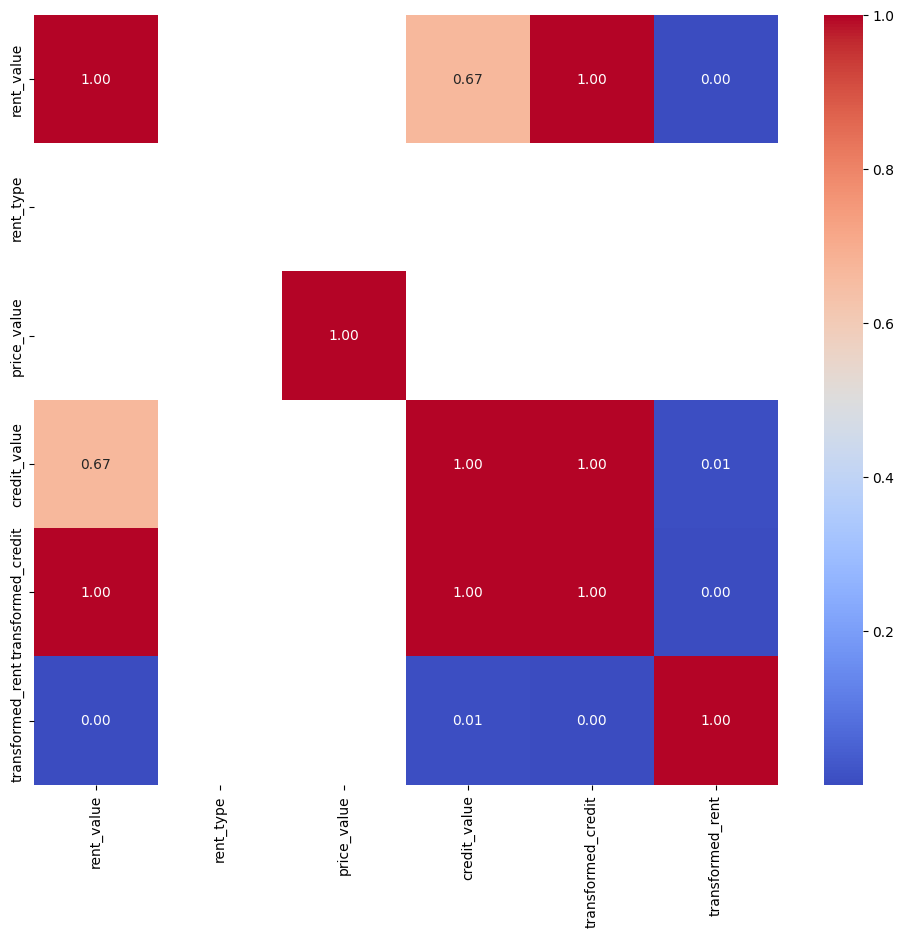

In [146]:
def ShowCorrMatrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.show()

ShowCorrMatrix(price_df_922_edited)